# **PHÂN TÍCH DỮ LIỆU**
---

Nhiệm vụ phần này: Đặt các câu hỏi có ý nghĩa, giải thích tại sao cần trả lời câu hỏi này và phân tích để trả lời câu hỏi.

Import các thư viện cần thiết

In [10]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('../Data/movie_data.csv')
df.head()

,Title,Release time,Age rating,Runtime,Language,IMDb Rating,IMDb Votes,Action,Adventure,Animation,...,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,Win,Nomination,Age rating quantification
0,Goon Squad,2024-01-18,NC-17,83.0,English,6.1,12215.766268,False,False,False,...,False,False,False,False,False,False,False,0.0,0.0,5
1,The Phantom Warrior,2024-02-20,R,83.0,English,2.6,532.000000,False,True,False,...,False,True,False,False,False,False,False,0.0,0.0,4
2,Beyond the Lake,2024-01-26,G,98.0,English,6.1,31.000000,False,False,False,...,False,False,False,False,False,False,False,0.0,0.0,1
3,Crimes of Fashion: Killer Clutch,2024-03-15,PG,84.0,"English, French",5.8,503.000000,False,False,False,...,False,False,False,False,False,False,False,0.0,0.0,2
4,Love on the Danube: Love Song,2024-09-10,G,84.0,English,5.8,175.000000,False,False,False,...,True,False,False,False,False,False,False,0.0,0.0,1


## Câu 1: Với từng thể loại khác nhau thì đánh giá của khán giá khác nhau như thế nào ? Liệu số lượng bình chọn có ảnh hưởng tới đánh giá của từng thể loại hay không?

### 1. Lợi ích của việc trả lời câu hỏi

Trả lời câu hỏi này giúp chúng ta tìm hiểu đánh giá của khán giả với từng thể loại phim khác nhau, từ đó phần nào diễn giáỉ sở thích, khẩu vị xem phim của họ. 

### 2. Mô tả thuật toán

- Để trả lời câu hỏi này nhóm sử dụng dữ liệu của cột IMDb Ratings, IMDb Votes và các cột thể loại phim để điểm trung bình cho từng thể loại và kết hợp so sánh với số lượng phim của từng thể loại để đưa ra kết luận, giả định rằng từng thể loại có đóng góp như nhau vào kết quả rating/votes của 1 bộ phim.

- Điểm trung bình sẽ được tính bằng Bayasian Average, có công thức như sau: 

    $$
    \text{Bayesian Average} = \frac{\sum_{i=1}^n r_i + m \cdot C}{n + m}
    $$

    Trong đó:
    
    - $r_i$ là rating mỗi phim,
    - $n$ là số lượng vote,
    - $m$ là trung bình tất cả đánh giá,
    - $C$ là trung bình tất cả vote.

### 3. Tiền xử lý

In [12]:
data = df.copy()

genre_columns = ['Action', 
                 'Adventure', 
                 'Animation',
                 'Biography', 
                 'Comedy', 
                 'Crime', 
                 'Documentary', 
                 'Drama', 
                 'Family',
                 'Fantasy', 
                 'History', 
                 'Horror', 
                 'Music', 
                 'Musical',
                 'Mystery', 
                 'Romance', 
                 'Sci-Fi', 
                 'Short', 
                 'Sport',
                 'Thriller', 
                 'War', 
                 'Western']

In [13]:
C = data['IMDb Votes'].mean()
m = data['IMDb Rating'].mean()

genre_avg_rating = []

for genre in genre_columns:
    filtered_movies = data[data[genre] == 1]
    total_votes = filtered_movies['IMDb Votes'].sum()
    total_movie = filtered_movies['IMDb Rating'].count()

    # Bayesian Average
    bayesian_avg = (C * m + (filtered_movies['IMDb Rating'] * filtered_movies['IMDb Votes']).sum()) / (C + total_votes)
    genre_avg_rating.append((genre, total_movie, bayesian_avg))

avg_rating_df = pd.DataFrame(genre_avg_rating, columns = ['Genre', 'Total Movie', 'Average Rating'])

In [14]:
genre_most_movie = avg_rating_df.sort_values(by='Total Movie', ascending=True)
avg_rating_df.sort_values(by='Average Rating', ascending=True, inplace=True)

### 4. Trực quan

#### a) Số lượng phim của từng thể loại

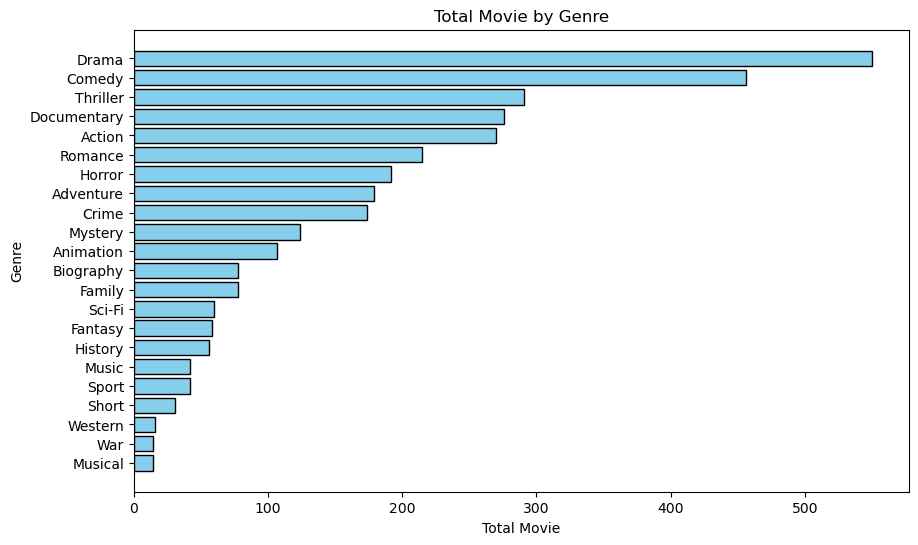

In [15]:
plt.figure(figsize=(10, 6))
plt.barh(genre_most_movie['Genre'], genre_most_movie['Total Movie'], color='skyblue', edgecolor='black')
plt.xlabel('Total Movie')
plt.ylabel('Genre')
plt.title('Total Movie by Genre')
plt.show()

Nhận xét:

+ Số lượng phim có chênh lệch khá lớn với nhiều thể loại có số lượng phim rất nhiều, hơn 400 bộ phim và nhiều thể loại lại có số lượng phim rất ít, nhỏ hơn 50 bộ phim. 
+ Thể loại phim có nhiều bộ phim nhất là Drama với hơn 500 bộ phim thuộc thể loại này, tiếp theo là Comedy cũng có số lượng phim rất cao. Hai thể loại gần như áp đảo các thể loại phim khác.
+ Thể loại phim có ít bộ phim nhất là Musical, War và Western với ít hơn 50 bộ phim thuộc thể loại này. 

Một số thông tin tham khảo có thể giải thích cho điều này:

- Thể loại kịch (Comedy, Drama): Kịch có thể đề cập đến rất nhiều chủ đề và vấn đề xã hội khác nhau, từ gia đình, tình yêu, mâu thuẫn cá nhân đến các vấn đề chính trị và xã hội. Nhờ đó, kịch dễ dàng kết nối với cảm xúc và trải nghiệm của khán giả. Ngoài ra, kịch có thể phục vụ cho nhiều độ tuổi và khẩu vị khác nhau bằng khả năng kết hợp tốt các thể loại khác. Các câu chuyện mang yếu tố này rất đa dạng và phù hợp với nhiều bối cảnh văn hóa khác nhau.

=> Vì lý do đó, yếu tố kịch được các nhà làm phim chú trọng sản xuất nhiều nhất.

- Thể loại War, Sport: Phim chiến tranh thường tập trung vào các tình huống cụ thể xoay quanh xung đột vũ trang. Số lượng các cuộc chiến tranh lớn có thể khai thác là có hạn. Tương tự, những bộ phim về thể thao thường tập trung vào các sự kiện nhất định và có thể bị hạn chế về khía cạnh nội dung nếu không có một câu chuyện mạnh mẽ.

- Thể loại Music và Musical: Khó đáp ứng được thị hiếu của nhiều người vì không phải ai cũng thích nhạc và có khả năng cảm nhạc, do đó thị trường cho thể loại phim này thường bị hạn chế rất nhiều. 

=> Những lý do đó là thách thức của các nhà sản xuất theo đuổi lợi nhuận, cũng khó cho những người không có chuyên môn, vì vậy những thể loại này không phải là ưu tiên hàng đầu cho việc sản xuất.


#### b) Điểm trung bình mỗi thể loại

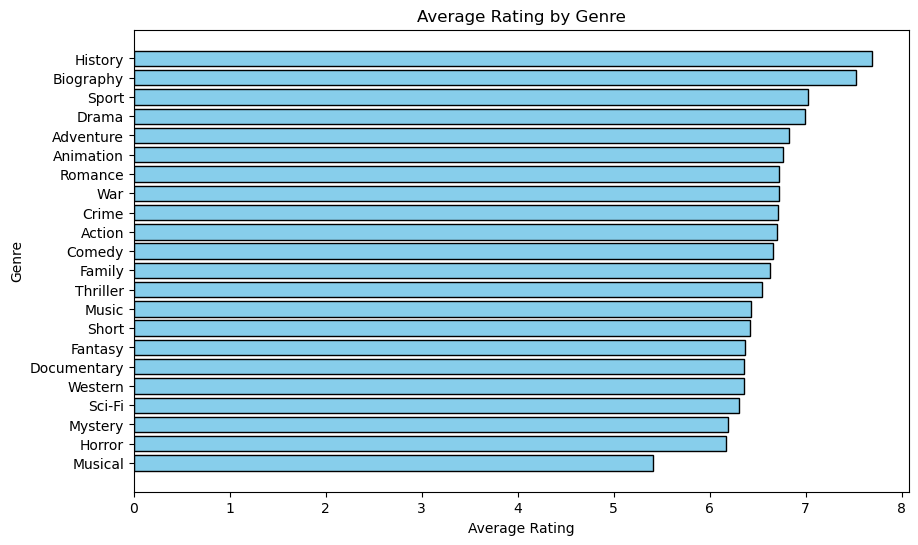

In [16]:
plt.figure(figsize=(10, 6))
plt.barh(avg_rating_df['Genre'], avg_rating_df['Average Rating'], color='skyblue', edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Average Rating by Genre')
plt.show()

Nhận xét:

+ Phổ điểm có sự chênh lệch nhưng không quá lớn, trải đều từ ~5.5 tới ~8 điểm.
+ Các thể loại phim có xếp hạng trung bình cao nhất là History và Biography với mức điểm trên 7 điểm. 
+ Thể loại có điểm thấp nhất là Musical, với điểm số ~5.5 điểm. 

### 5. Insight

Từ 2 trực quan trên, ta có thể rút ra được thông tin sau: 

+ Số lượng và chất lượng không tương quan mạnh mẽ: Mặc dù Drama là thể loại có số lượng phim lớn nhất, nhưng xếp hạng trung bình của nó chỉ ở mức khá (xếp thứ 4 trong biểu đồ bên trái). Ngược lại, các thể loại như History, Biography, và Sport tuy có số lượng phim thấp hơn nhưng lại có xếp hạng trung bình rất cao. Điều này cho thấy số lượng phim lớn không đảm bảo chất lượng của thể loại đó là tốt hay được ưa thích một cách tuyệt đối.

+ Các thể loại ít nhưng chất lượng: Các thể loại như History, Biography và Sport thường hướng đến đối tượng khán giả cụ thể, nhưng nội dung có chiều sâu và ý nghĩa. Đây là các thể loại mà nhà sản xuất có thể tập trung đầu tư để tạo ra những bộ phim chất lượng, vì khán giả có xu hướng đánh giá cao.

+ Các thể loại phổ biến nhưng chất lượng không quá tốt: Các yếu tố như Drama, Comedy, Documentary có xuất hiện trong rất nhiều bộ phim, nhưng đánh giá của thể loại này lại chỉ ở mức khá hoặc trung bình. Điều này có thể do các nhà làm phim không thể đáp ứng đủ yêu cầu của số lượng người xem quá lớn, có phần dễ dãi trong sản xuất, kịch bản khiến nhiều bộ phim có đánh giá thấp. 

+ Các thể loại không được đánh giá cao: Thể loại Sci-Fi, Horror và Musical vừa có xếp hạng trung bình thấp, vừa có số lượng phim ít. Điều này có thể phản ánh rằng các thể loại này chưa đáp ứng được kỳ vọng của khán giả, cũng như chưa được khai thác đúng cách.


## Câu 2: Các phim thuộc thể loại nào có nhiều khả năng được đề cử hoặc giành giải thưởng nhất?

### 1. Lợi ích của việc trả lời câu hỏi

- Giúp các nhà làm phim định hướng chọn thể loại để tăng khả năng được đề cử và giành giải thưởng.
- Tối ưu hoá chiến lược phát triển nội dung dựa trên xu hướng thành công.
- Các nhà đầu tư có thể định hướng tài trợ vào các dự án có khả năng được đánh giá cao.
- Hiểu rõ xu hướng thị hiếu và tiêu chí đánh giá từ các hội đồng giải thưởng.

### 2. Mô tả thuật toán 

- Phân tích mối tương quan giữa thể loại phim và số lần được đề cử hoặc giành giải (dựa vào cột "Win" và "Nomination").
- Tính tổng số lần đề cử và giải thưởng của từng thể loại.
- Xác định thể loại nổi bật bằng cách sắp xếp theo số liệu tổng hợp.
- Vẽ biểu đồ thanh (bar chart) để thể hiện tổng số đề cử và giải thưởng của từng thể loại.
- Sử dụng biểu đồ tròn (pie chart) để phân tích tỉ lệ đóng góp của các thể loại hàng đầu.

### 3. Tiền xử lý

In [17]:
# genre_columns = [
#     "Action/Adventure", "Animation", "Biography/History/War", "Comedy",
#     "Docummentary", "Drama", "Fantasy/Sci-Fi", "Horror/Thriller/Mystery",
#     "Kids/Family", "Music/Musical", "Other", "Romance"
# ]
movie_data = df.copy()

# Tính tổng số đề cử và thắng giải của từng thể loại
genre_awards = {
    genre: {
        "Nominations": movie_data.loc[movie_data[genre] == True, "Nomination"].sum(),
        "Wins": movie_data.loc[movie_data[genre] == True, "Win"].sum()
    }
    for genre in genre_columns
}

genre_awards_df = pd.DataFrame(genre_awards).T
genre_awards_df['Total'] = genre_awards_df['Nominations'] + genre_awards_df['Wins']

# Sắp xếp theo tổng số lần đề cử và thắng giải
genre_awards_df = genre_awards_df.sort_values(by="Total", ascending=False)

### 4. Trực quan

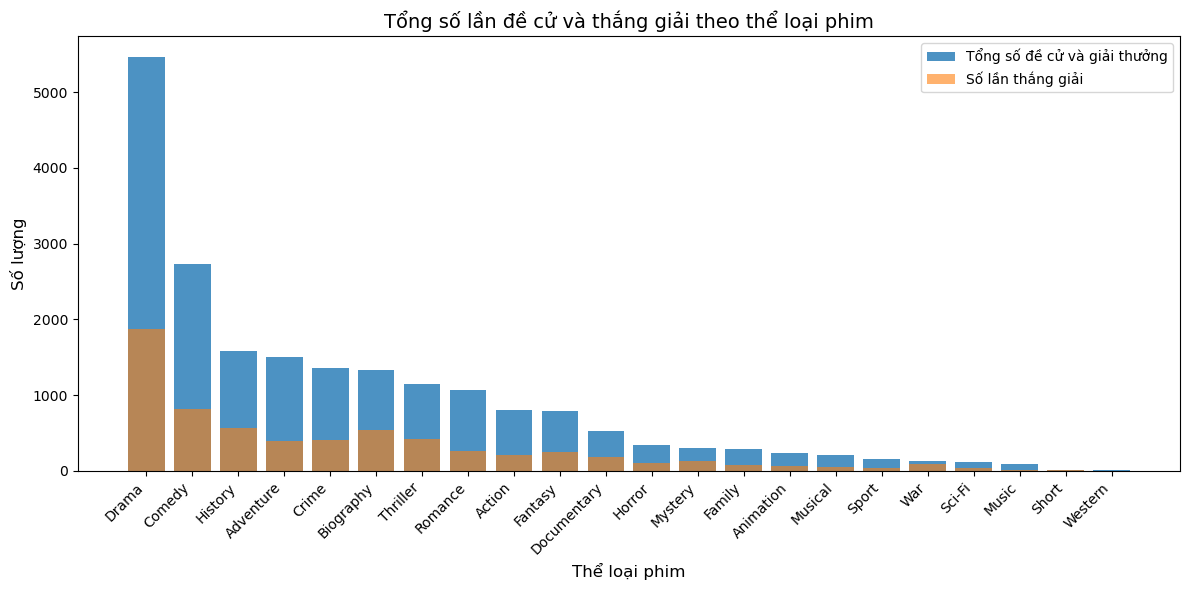

In [18]:
plt.figure(figsize=(12, 6))
plt.bar(genre_awards_df.index, genre_awards_df['Total'], alpha=0.8, label='Tổng số đề cử và giải thưởng')
plt.bar(genre_awards_df.index, genre_awards_df['Wins'], alpha=0.6, label='Số lần thắng giải')

plt.title('Tổng số lần đề cử và thắng giải theo thể loại phim', fontsize=14)
plt.xlabel('Thể loại phim', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

### 5. Insight

Nhận xét: 

1. Thể loại nổi bật:
- Các thể loại như Drama, Comedy và History có số lần đề cử và thắng giải cao nhất.
- Drama vượt trội rõ ràng với tổng số lần được đề cử và thắng giải lớn nhất.

2. Thể loại kém nổi bật:
- Thể loại như Western, Short, Music, Sci-Fi có số lượng thấp hơn, ít cơ hội xuất hiện trong các đề cử hoặc thắng giải.

Kết luận chung:

1. Drama và Comedy là những "ứng cử viên" sáng giá:
- Các bộ phim thuộc thể loại Drama thường nhận được nhiều sự chú ý nhất từ các giải thưởng.
- Các thể loại có tính giáo dục và ý nghĩa lịch sử (Biography, History) cũng thường được đề cao.

2. Đề cử không đồng nghĩa với thắng giải:
- Dù nhiều thể loại có số lượng đề cử lớn, không phải tất cả đều chuyển hóa thành chiến thắng.

3. Chiến lược sản xuất:
- Nếu mục tiêu là đạt giải thưởng, các nhà sản xuất nên tập trung vào Drama hoặc kết hợp nội dung với yếu tố lịch sử, tiểu sử.

4. Cần cân nhắc khán giả:
- Trong khi các thể loại như Music, Short,.. ít đạt giải, chúng vẫn có thể thành công thương mại vì đáp ứng nhu cầu giải trí.

## Câu 3: Nhóm tuổi (Age rating) ảnh hưởng thế nào đến sự phổ biến của các thể loại phim qua số lượt bình chọn IMDb?

### 1. Lợi ích của việc trả lời câu hỏi

- **Hiểu rõ mức độ quan tâm của khán giả**: Tỉ trọng IMDb Votes thể hiện mức độ yêu thích và quan tâm thực tế của khán giả đối với từng thể loại phim trong mỗi nhóm tuổi, giúp đánh giá chính xác thị hiếu.

- **Định hướng chiến lược sản xuất và đầu tư**: Nhà sản xuất và nhà đầu tư có thể dựa vào tỉ trọng bình chọn để ưu tiên phát triển các thể loại phim được khán giả ở từng độ tuổi ưa chuộng nhất, tối ưu hóa lợi nhuận.

- **Phát hiện xu hướng thị trường**: Tỉ trọng IMDb Votes có thể cho thấy sự thay đổi trong sở thích của từng nhóm tuổi, giúp các nhà phát hành phim cập nhật danh mục thể loại để thu hút khán giả.

- **Nâng cao chất lượng nền tảng xem phim**: Các nền tảng phân phối phim trực tuyến có thể gợi ý nội dung phù hợp hơn cho người dùng dựa trên xu hướng đã phân tích, cải thiện trải nghiệm cá nhân hóa.

### 2. Mô tả thuật toán

- **Cột cần thiết**: `Age rating`, `IMDb Votes` và các cột thể loại

- **Tính toán**: 
    - Tính trung bình lượt bình chọn và tần suất xuất hiện của các thể loại theo từng phân loại độ tuổi
    
    - Tính tỉ trọng (phần trăm) của `IMDb Votes` cho từng thể loại trong mỗi nhóm tuổi

- **Trực quan hóa**: 

    - Dùng biểu đồ Barchart để trực quan số lượt bình chọn trung bình
    
    - Vẽ biểu đồ Heatmap với các hàng là các nhóm tuổi, mỗi cột đại diện cho một thể loại và màu sắc thể hiện tỉ trọng `IMDb Votes`

### 3. Tiền xử lý

In [19]:
# Nhóm dữ liệu theo "Age rating" và tính toán các thống kê mô tả của số lượt bình chọn IMDb
age_rating_stats = df.groupby('Age rating')['IMDb Votes'].describe()
age_rating_stats

,count,mean,std,min,25%,50%,75%,max
Age rating,,,,,,,,
G,174.0,1785.228320,3318.665503,5.0,200.75,606.500000,1074.500000,12215.766268
NC-17,24.0,6731.331729,6097.368016,9.0,51.25,12215.766268,12215.766268,12215.766268
PG,268.0,7268.295217,24071.135211,6.0,79.25,549.000000,6381.000000,251438.000000
PG-13,444.0,15824.354369,52053.002438,5.0,236.25,1487.000000,12215.766268,571413.000000
R,783.0,14348.906954,46251.608918,6.0,342.50,1763.000000,9598.000000,804987.000000


In [20]:
# # Gom nhóm dữ liệu dựa trên Age rating và thể loại phim
# genre_columns = ['Action', 'Adventure', 'Animation',
#        'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
#        'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
#        'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']

# Tính tổng số phim cho mỗi thể loại theo từng nhóm tuổi
grouped_data = df.groupby("Age rating")[genre_columns].sum()
grouped_data

# Tính IMDb Votes cho từng thể loại
for genre in genre_columns:
    df[genre + "_votes"] = df[genre] * df["IMDb Votes"]

# Tính tổng IMDb Votes của từng thể loại theo nhóm tuổi
grouped_votes = df.groupby("Age rating")[[col + "_votes" for col in genre_columns]].sum()

# Đổi tên cột cho dễ đọc
grouped_votes.columns = genre_columns

# Chuẩn hóa dữ liệu theo tỉ trọng (%) trong mỗi nhóm tuổi
grouped_percentage = grouped_votes.div(grouped_votes.sum(axis=1), axis=0) * 100

### 4. Trực quan

#### a) Trung bình số lượt bình chọn IMDb theo từng phân loại độ tuổi

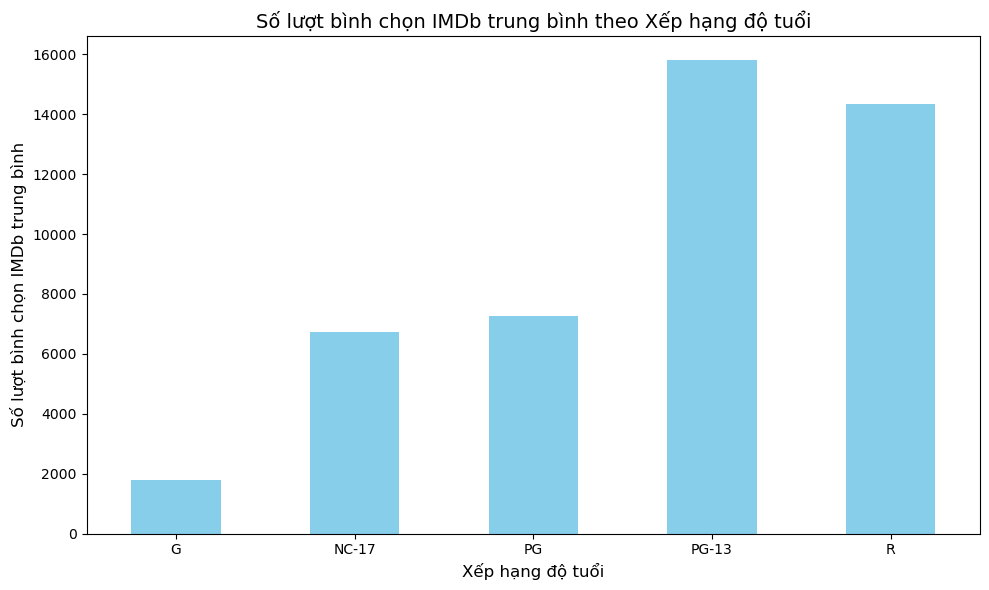

In [21]:
# Trung bình số lượt bình chọn IMDb theo từng phân loại độ tuổi
age_rating_avg_votes = age_rating_stats['mean']

plt.figure(figsize=(10, 6))
age_rating_avg_votes.plot(kind='bar', color='skyblue')
plt.title('Số lượt bình chọn IMDb trung bình theo Xếp hạng độ tuổi', fontsize=14)
plt.xlabel('Xếp hạng độ tuổi', fontsize=12)
plt.ylabel('Số lượt bình chọn IMDb trung bình', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Nhận xét**

- Phim nhắm đến khán giả thanh thiếu niên và người trưởng thành (**PG-13** và **R**) có mức độ phổ biến cao nhất, thể hiện qua số lượt bình chọn IMDb trung bình cao hơn đáng kể so với các nhóm khác.

- Phim dành cho trẻ em hoặc mọi lứa tuổi (**G** và **PG**) thường có mức độ phổ biến thấp hơn, có thể do đối tượng khán giả mục tiêu ít tham gia bình chọn trên IMDb.

- **NC-17** không phải là phân loại lý tưởng để thu hút sự phổ biến rộng rãi, do đối tượng khán giả bị giới hạn.

#### b) Tần suất phim và số lượng bình chọn theo thể loại và độ tuổi

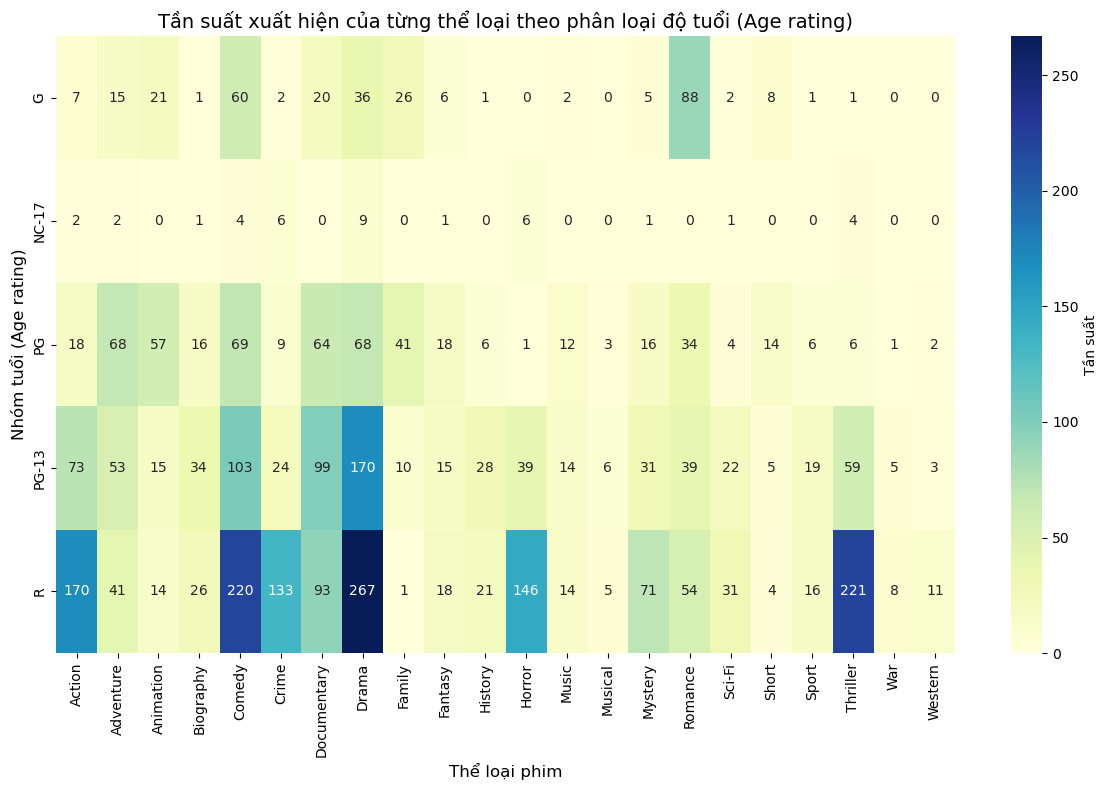

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_data, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={"label": "Tần suất"})

title = "Tần suất xuất hiện của từng thể loại theo phân loại độ tuổi (Age rating)"
plt.title(title, fontsize=14)
plt.xlabel("Thể loại phim", fontsize=12)
plt.ylabel("Nhóm tuổi (Age rating)", fontsize=12)

plt.tight_layout()
plt.show()

**Nhận xét**

- Các thể loại như Drama, Action, và Thriller chủ yếu hướng đến khán giả trong phân loại độ tuổi **R** và **PG-13**.

- Thể loại nhẹ nhàng hơn như Animation, Family, và Comedy lại phổ biến trong các nhóm **G** và **PG**.

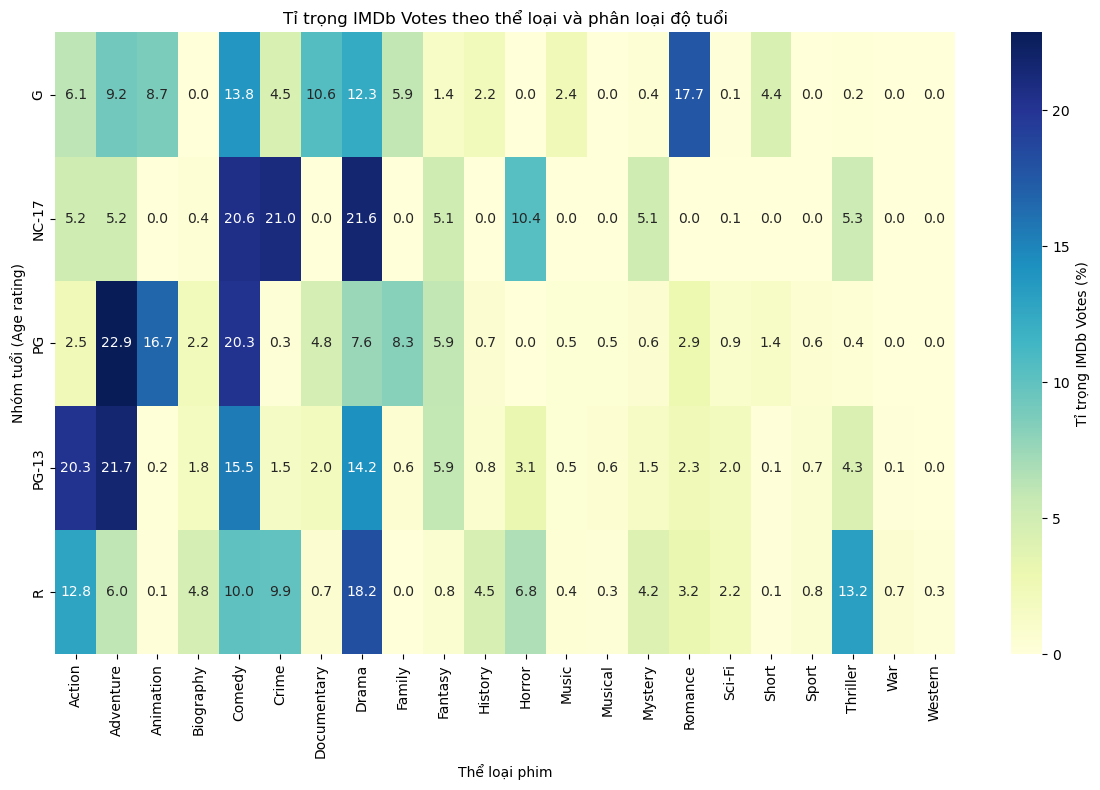

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_percentage, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Tỉ trọng IMDb Votes (%)'})
plt.title("Tỉ trọng IMDb Votes theo thể loại và phân loại độ tuổi")
plt.xlabel("Thể loại phim")
plt.ylabel("Nhóm tuổi (Age rating)")
plt.tight_layout()
plt.show()

**Nhận xét**

- Tỉ trọng IMDb Votes phản ánh rõ rệt rằng các thể loại như Action, Drama, và Thriller được khán giả trưởng thành (**R**) và thanh thiếu niên (**PG-13**) đánh giá nhiều nhất.

- Thể loại nhẹ nhàng như Animation hay Family có tỉ trọng IMDb Votes khá khiêm tốn, dù xuất hiện thường xuyên trong nhóm trẻ em.

**Kết luận**

- **Phân loại độ tuổi R**: Yêu thích và đánh giá cao các thể loại như Drama, Thriller, Action, và Horror. Các thể loại này vừa có tần suất xuất hiện cao vừa có tỉ trọng IMDb Votes lớn.

- **Phân loại độ tuổi PG-13**: Thể loại Action, Drama, và Thriller phổ biến cả về tần suất lẫn tỉ trọng bình chọn, thể hiện sự hấp dẫn của các phim có nội dung kịch tính và hấp dẫn.

- **Phân loại độ tuổi G và PG**: Thể loại Animation, Family, và Comedy xuất hiện thường xuyên nhưng tỉ trọng IMDb Votes lại không quá cao, phản ánh mức độ tương tác của khán giả nhỏ tuổi thấp hơn.

- **Phân loại độ tuổi NC-17**: Tỉ trọng IMDb Votes cho thể loại như Comedy và Horror cao, dù tần suất xuất hiện của các thể loại này thấp.

### 5. Insight

- Nhóm tuổi **PG-13** và **R** đóng vai trò quan trọng nhất trong việc xác định sự phổ biến và thành công của các thể loại phim như Action, Drama, và Thriller. Các nhà làm phim nên nhắm đến các đối tượng khán giả tuổi thanh thiếu niên (**PG-13**) hoặc trưởng thành (**R**) để tăng sức hút và mức độ phổ biến của phim trên thị trường.

- Các nhóm tuổi nhỏ tuổi có sự tập trung cao vào các thể loại Animation và Family nhưng ít đóng góp vào lượt bình chọn IMDb. Đối với các bộ phim dành cho trẻ em hoặc gia đình, cần có chiến lược khác (ví dụ: tiếp thị trên các nền tảng không phụ thuộc vào đánh giá của khán giả trưởng thành như IMDb) để gia tăng mức độ nhận diện và thu hút khán giả mục tiêu.

## Câu 4: Thời lượng phim (Runtime) ảnh hưởng như thế nào đến số lượng IMDb Votes và IMDb Rating?

Thời lượng phim là một yếu tố khá quan trọng vì nó ảnh hưởng đến trải nghiệm của người xem. Thời lượng dài có thể giúp phim phát triển cốt truyện chi tiết hơn, nhưng cũng tiềm ẩn nhiều nguy cơ như có thể làm giảm hứng thú nếu không được xây dựng tốt và tốn kém nhân lực và nguồn lực vì cần đầu tư nhiều hơn.

Trả lời câu hỏi này giúp chúng ta xác định thời lượng lý tưởng của một bộ phim để thu hút khán giả và đạt được điểm đánh giá cao.


Để trả lời câu hỏi này ta sẽ sử dụng 3 cột là **Runtime, IDMb Votes** và **IMDb Rating**
- Phân tích phân phối thời lượng phim.
- Xem sự tương quan giữa **Runtime** và 2 đặc trưng còn lại.
- Kiểm tra sự ảnh hưởng của thời lượng đến số lượt bình chọn và đánh giá. Liệu phim có thời lượng thế nào có xu hướng đạt được nhiều bình chọn hoặc đánh giá hơn không? 

## Câu 5: Thể loại nào có xu hướng phát triển mạnh nhất trong thời gian qua dựa trên số lượng phim phát hành?

Khi theo dõi xu hướng thị trường thì số lượng phim phát hành qua các năm sẽ phản ảnh được sự phát triển của từng thể loại trong ngành điện ảnh. Từ đó, giúp ta dự đoán thể loại nào sẽ tiếp tục phát triển, có khả năng phát triển hay sẽ trở nên lỗi thời. 

Trả lời câu hỏi này giúp dự đoán xu hướng phát triển của ngành công nghiệp điện ảnh để định hướng đầu tư vào các thể loại tiềm năng trong tương lai.

Để trả lời câu hỏi này ta cần 2 cột là **Release time** và 13 cột thể loại
- Tính tổng số lượng phim phát hành mỗi năm theo từng thể loại.
- Trực quan hóa xu hướng của mỗi thể loại qua các năm để so sánh sự thay đổi về số lượng phim phát hành của từng thể loại.
- Phân tích sự tăng trưởng hay suy giảm của từng thể loại để xác định thể loại nào tăng trưởng nhanh hay đang xuống dốc
- Uớc tính số lượng phim phát hành của từng thể loại trong các năm tiếp theo.